<i> Gautier Quentin </i> <br>
<i> Pallatier-Martinez Lucas </i> <br>
<i> El Bannadi Khadija </i> <br>
<i> Debiche Rafed </i> <br>

<div align="center"> <b> Traitement du signal </b> </div>
<div align="center"> <b> Projet - Escape No Game </b> </div>
<div align="center"> <b> Livrable 4 </b> </div>

<br>
<b> <u> I. Contexte : </u> </b> <br>
<br>
Maintenant que nous avons notre chaîne de transmission du message ainsi que les connaissances et moyens pour le moduler, le transmettre et le récupérer, nous pouvons coder le tout en Python. Ce code appuiera notre POC que nous présenterons au comité de pilotage. Le code ci-après est fragmenté pour faciliter sa lecture et des explications et des commentaires aideront à la compréhension.

<br>
<b> <u> II. Code Python : </u> </b> <br>
<br>

### Importation des modules nécessaires

Pour pouvoir moduler, démoduler et afficher les graphiques des signaux, nous aurons besoin des bibliothèques <i>numpy</i> et <i>matplotlib.pyplot</i>. Nous aurons besoin également de la bibliothèque <i>sounddevice</i> qui nous permettra de jouer le son modulé ainsi que celui de l'accusé de réception. Enfin, la bibliothèque <i>time</i> nous sert  à simuler une réflexion de la machine ou la transmission que nous affichons avec deux phrases.

numpy : bibliothèque nous permettant d'utiliser des notions mathématiques, ici le sinus, le nombre pi ainsi que la fonction trapèze; <br>
<br>
matplotib.pyplot : bibliothèque permettant d'afficher les signaux sous forme de graphique dont nous pouvons définir la taille, l'abscisse et l'ordonnée; <br>
<br>
sounddevice : bibliothèque permettant de jouer des sons à partir d'un fichier ou d'un signal généré par python dans notre cas; <br>
<br>
time : bibliothèque nous permettant d'utiliser des fonctions liées au temps, ici <i>time.sleep</i> notamment;

In [5]:
#Bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time

# Émission

Ici, l'agent renseigne le message qu'il souhaite transmettre. Ce message doit faire entre 5 et 10 caractères, caractères spéciaux compris. La fonction <i>print()</i> permet d'afficher le message renseigné afin de corriger une potentielle faute de frappe avant la transmission.

In [6]:
#Ecriture du message de l'Agent
Message = str(input('Entrez le message à envoyer (5 à 10 caractères) : '))
print(Message) #Affiche le message écrit par l'agent

@


### Conversion du message texte en binaire via la table ASCII

Ce programme, à l'aide de la fonction <i>ord()</i> qui permet de trouver la valeur décimale associé à chaque caractère via la table ASCII, convertit en binaire cette valeur décimale et la renvoie afin qu'elle subisse l'encodage CRC. Le programme réalise une boucle tant que tous les caractères de la chaîne renseignée par l'agent n'ont pas été traités et les concatène à la fin.

In [7]:
#Conversion du message texte en binaire via la table ASCII
total_binaire = '' #Création liste total_binary
for i in range(len(Message)):
    binaire = ''   #Création liste binary
    string_ord = ord(Message[i])  #Renvoie le décimal correspondant à chaque caratère de la chaîne de caractères
    while string_ord > 0:   #Boucle tant qu'il y a un caractère
        x = string_ord % 2
        string_ord = string_ord // 2
        binaire = str(x) + str(binaire)
    total_binaire += binaire #Concaténation des valeurs binaires (si plusieurs caractères à traiter)

print(total_binaire) #Affiche la liste total_binary, soit la valeur binaire égale à la valeur décimale associée à la chaîne de caractères

1000000


### Encodage CRC

Pour réaliser le calcul de la clé CRC à partir de la valeur binaire du message et du diviseur CRC, nous avons divisé le programme en trois fonctions distinctes : une fonction <i>xor()</i>, une fonction <i>Division_eucl()</i> et une fonction <i>encodage()</i>. Nous avons fixé le polynôme générateur G(x) = x^3 + 1. Le diviseur CRC vaut donc 1001.

def xor() : prend en paramètres deux valeurs binaires appelées a et b qui vaudront 0 ou 1 et réalise un calcul de OU EXCLUSIF; <br>
<br>
def Division_eucl() : prend en paramètres un dividende (valeur binaire du message) et un diviseur (diviseur CRC fixé à 1001) et réalise la division euclidienne entre ces valeurs. La fonction renvoie le reste de cette division (clé CRC à ajouter au message binaire). <br>
<br>
def encodage() : prend en paramètres data (message binaire auquel on concatène autant de 0 que la longueur du diviseur CRC, soit '0000') et key (diviseur CRC) et réalise l'algorithme CRC. Cette fonction appelle les fonctions <i>xor()</i> et <i>Division_eucl()</i> mentionnées plus haut et renvoie le message binaire et la clé CRC concaténés.

In [8]:
#Définition de la fonction XOR utilisée pour la division
def xor(a, b):
    resultat = [] #Initialisation du résultat
    for i in range(1, len(b)): #Boucle pour appliquer la fonction XOR (si les bits sont les mêmes, alors XOR vaut 0, sinon XOR vaut 1)
        if a[i] == b[i]:
            resultat.append('0')
        else:
            resultat.append('1')
    return ''.join(resultat) #On retourne les données de la fonction XOR sous forme d'une chaîne de caractères

#Définition de la fonction division euclidienne
def Division_eucl(dividende, diviseur):
    val = len(diviseur)
    tmp = dividende[0 : val]
    while val < len(dividende):
        if tmp[0] =='1':
            tmp = xor(diviseur, tmp) + dividende[val]
        else:
            tmp = xor('0' * val, tmp) + dividende[val]
        val +=  1
    if tmp[0] =='1':
        tmp = xor(diviseur, tmp)
    else:
        tmp = xor('0' * val, tmp)
    check = tmp
    return check

#Définition de la fonction d'encodage CRC (total_binary + 'N-bits 0', G (le polynôme générateur))
def encodage(data, key):
    long_key = len(key)
    data_ajout = data + '0'*(long_key-1)
    reste = Division_eucl(data_ajout, key)
    data_encode = data + reste
    return data_encode

#Fonction Main
data = total_binaire + '0000'
key = '1001' #Diviseur CRC fixé à 1001, G(x) = x^3 + 1
print("Les données à envoyer sont :", data) #Affiche la valeur binaire à envoyer
time.sleep(1) #Utilisation de la bibliothèque time pour laisser le temps à l'agent de prendre connaissance des données à envoyer et du diviseur
print("Le diviseur CRC est :", key) #Affiche le diviseur CRC utilisé
time.sleep(2) #Utilisation de la bibliothèque time pour simuler une réflexion de la machine
data_crc = encodage(data, key)
print("Les données encodées avec la clé sont :", data_crc) #Affiche la valeur binaire concaténée avec la clé calculée

Les données à envoyer sont : 10000000000
Le diviseur CRC est : 1001
Les données encodées avec la clé sont : 10000000000010


### Codage Manchester

Le programme ci-après réalise l'encodage Manchester des données encodées avec la clé CRC et renvoie deux listes : une liste de booléens correspondant à une valeur binaire (False pour '0' et True pour '1') et une liste d'entiers contenant l'équivalent Manchester des données encodées.

In [9]:
#Création d'une liste de booléens correspondant à data_crc (False pour '0', True pour '1')
message_bool = []
for i in range(0, len(data_crc),1):
    if data_crc[i] =='1':
        message_bool.append(True)
    if data_crc[i] =='0':
        message_bool.append(False)
print(message_bool) #Affiche la liste de booléens

#Codage Manchester du message
message_code = []
for ii in range(0, len(message_bool)):
    if message_bool[ii] == True:
        message_code.extend([int(1)])
        message_code.extend([int(0)])
    if message_bool[ii] == False:
        message_code.extend([int(0)])
        message_code.extend([int(1)])
print(message_code) #Affiche le message codé Manchester

[True, False, False, False, False, False, False, False, False, False, False, False, True, False]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]


### Modulation ASK

Les lignes ci-dessous permettent la modulation du signal à partir de la liste obtenue au-dessus. Nous initialisons pour cela différentes variables : la fréquence d'échantillonnage, la fréquence et l'amplitude de la porteuse, le débit binaire, le nombre de bits initial, le nombre de symboles par bit, le nombre total de bits à moduler ainsi que le vecteur temps. <br>
Une fois toutes les valeurs fixées et opérations réalisées, nous affichons le signal Manchester ainsi que le signal modulé par amplitude.

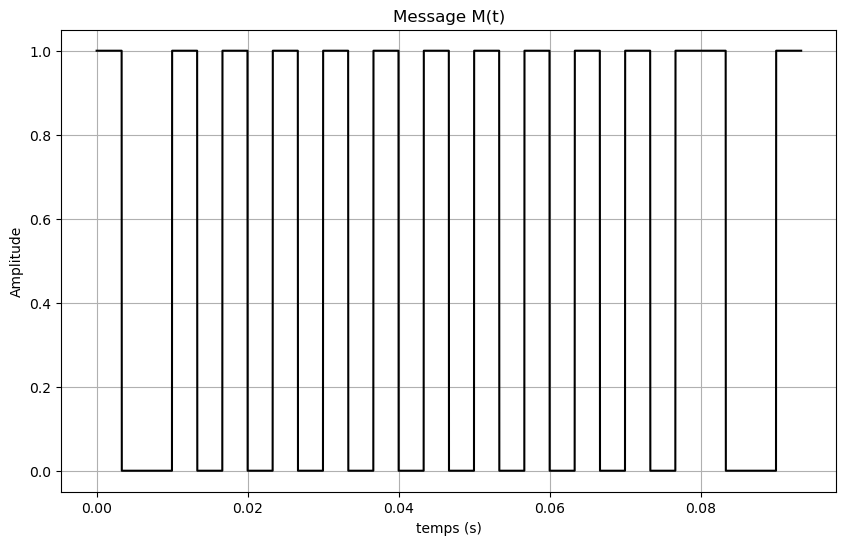

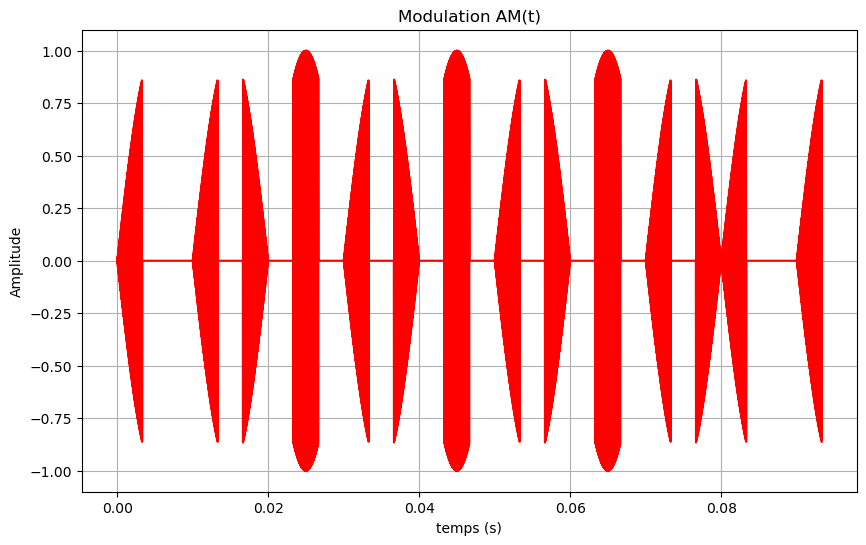

In [10]:
#Modulation ASK du message
M = message_code
Fe = 44100 #Fréquence d'échantillonnage
Fp = 22000 #Fréquence de la porteuse 
baud = 300 #Débit binaire
Nbits = len(M) #Nombre de bits initial
Ns = Fe / baud #Nombre de symboles par bit
N = Nbits * Ns #Nombre total de bits à moduler

#On génère le message binaire dupliqué
M_duplique = np.repeat(M, Ns)

#On génère le vecteur temps
t = np.arange (0.0, N) / Fe

#On génère la porteuse P(t)
Ap = 1 #Amplitude de la porteuse
Porteuse = Ap * np.sin(2 * np.pi * Fp * t) #Fonction de la porteuse

#On réalise la modulation en amplitude (ASK)
ASK = Porteuse * M_duplique


#Affichage Message binaire et modulation
plt.figure (figsize = (10,6))
plt.plot(t, M_duplique, 'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.figure (figsize = (10,6))
plt.plot(t, ASK, 'r')
plt.title('Modulation AM(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

### Émission du message sous forme de son

In [11]:
#Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)

### Simulation de la transmission du message

In [12]:
message = "Le message est en cours de transmission..."

for char in message:
    print(char, end='', flush=True)
    time.sleep(0.1)  #Ajuster la durée selon préférences
print()

Le message est en cours de transmission...


# Réception

### Simulation de la réception du message

In [13]:
nmessage = "Le message est en cours de réception..."

for char in nmessage:
    print(char, end='', flush=True)
    time.sleep(0.1)  #Ajuster la durée selon préférences

Le message est en cours de réception...

### Démodulation ASK

Pour démoduler le signal et donc récupérer le message de l'agent, l'agent d'écoute doit utiliser les mêmes fréquences d'échantillonnage et de porteuse ainsi que le même débit binaire. En multipliant la porteuse avec le signal modulé, l'agent obtiendra le signal démodulé.

[ 0.          0.00712373 -0.0142471  ... -0.85514276  0.85881395
 -0.86244156]


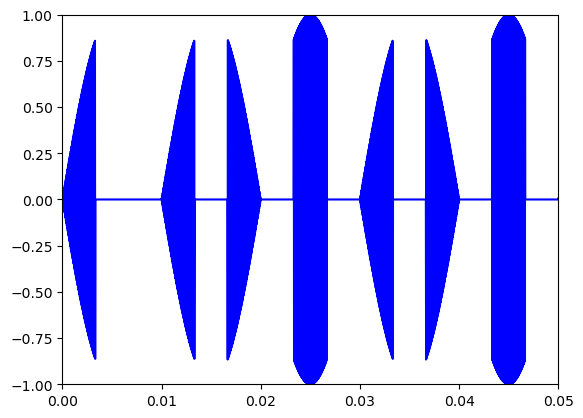

In [14]:
#Démodulation ASK du signal
Fe = 44100
Fp = 22000
baud = 300
N = len(ASK)
Ns = Fe / baud

t = np.arange (0.0, N)/Fe

Porteuse = np.sin(2 * np.pi * Fp * t)
Produit = ASK * Porteuse #Produit du signal modulé et de la porteuse pour obtenir le signal démodulé

#Intégration
y = []
for i in range(0,int(N), int(Ns)):
    y.append(np.trapz(Produit[i:i+int(Ns)], t[i:i+int(Ns)])) #Utilisation de la méthode des trapèzes

plt.plot(t, ASK, 'b')
plt.axis([0, 0.05, -1, 1])
print(ASK) #Affiche le signal démodulé

### Décodage Manchester

Le programme suivant réalise le désencodage Manchester à partir du signal démodulé. La fonction renvoie la liste de caractères correspondant au message transmis avec la clé CRC.

In [15]:
#Décodage Manchester
message_demodule = np.array(y)>0

message_recu_decode = [] #Initialisation de la liste pour stocker les valeurs binaires à partir du signal démodulé
for iii in range(0, len(message_demodule)):
    if message_demodule[iii] == True:
        message_recu_decode.extend([int(1)])
    if message_demodule[iii] == False:
        message_recu_decode.extend([int(0)])

message_recu_bin = [] #Initialisation de la liste pour stocker les valeurs binaires à partir de la liste message_recu_decode
for iiii in range(0, len(message_demodule), 2):
    if message_recu_decode[iiii] == 1 and message_recu_decode[iiii+1] == 0:
        message_recu_bin.extend([str(1)])
    if message_recu_decode[iiii] == 0 and message_recu_decode[iiii+1] == 1:
        message_recu_bin.extend([str(0)])
print(message_recu_bin) #Affichage de la liste du décodage Manchester

['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0']


### Conversion de la liste en chaîne de caractère pour les étapes suivantes

Ici, l'agent d'écoute transforme la liste d'entiers du décodage Manchester en une chaîne de caractères équivalente et l'affiche.

In [16]:
#conversion liste en chaine de caractère
message_receptionne =''.join(message_recu_bin)
print(message_receptionne) #Affiche la chaîne de caractères à partir de la liste message_recu_bin

10000000000010


### Décodage CRC et vérification d'erreur

L'agent d'écoute utilise de nouveau l'algorithme CRC afin de récupérer le message transmis par l'agent dans la salle de conférence. Cet algorithme réalise des opérations de OU EXCLUSIF afin d'obtenir un reste nul. Si tel est le cas, alors le message a été récupéré et aucune erreur ne s'est glissée lors de la transmission.

In [17]:
#Définition de la fonction de décodage
def decodage(data_crc, key):
    long_key = len(key)
    data_ajout = data_crc + '0' * (long_key-1)
    reste = Division_eucl(data_ajout, key)
    return reste

key = '1001'
check = decodage(message_receptionne, key)                      #Récupération du reste de la division euclidienne du message réceptionné par la clé
print("Le reste de la division après décodage est -> " + check)
temp = "0" * (len(key) - 1)                                     #Récupération du message de base
if check == temp:
    print("Les données -> " + data + " <- ont bien été reçues!")
else:
    print("Erreur de réception")

Le reste de la division après décodage est -> 000
Les données -> 10000000000 <- ont bien été reçues!


### Conversion du message binaire en texte via la table ASCII

Ce programme permet de passer le message binaire en décimal et de récupérer le caractère associé via la table ASCII. Cela est possible grâce à la fonction <i>chr()</i> qui récupère le caractère Unicode lié à la valeur décimale.

In [18]:
#Définition de la fonction de conversion du binaire en décimale
def BinaryToDecimal(binary):  
    #initialisation des variables
    decimal = 0
    i = 0
    n = 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

#Conversion du message binaire en texte via la table ASCII
Total_texte = ''
for i in range(0, len(message_receptionne), 7):
    bin_data = int(message_receptionne[i:i+7])
    decimal_data = BinaryToDecimal(bin_data)
    Total_texte = Total_texte + chr(decimal_data)

### Affichage du message

In [19]:
#Affichage du message
print(Total_texte)

@


### Accusé de réception

Ces lignes permettent l'émission d'un son aigu en cas de bonne réception du message émis par l'agent dans la salle de conférence.

In [20]:
verification = int(check,2)
FeA = 44100
t = np.arange(0, 0.2, 1 / FeA)
Accusé_réception = np.sin(2 * np.pi * 5000 * t)
if verification == 0:
    sd.play(Accusé_réception, FeA)   #Émission du message sous forme de signal